<center>
<h1 style="color: #√;">Python</h1> 
<h3 style="color: #333333;">Ejercicios Numpy, Pandas y gráficos</h3> 
</center>

<br>


#### Autor: escribir aquí el nombre del autor


<h2 style="color: #007BC4;">Numpy</h2>
<hr style="border: 0.5px solid #007BC4;">

El array de numpy <code>gdp_2016</code> contiene el producto interior bruto de países del mundo en el año 2016, en dólares. 



In [2]:
import numpy as np
import pandas as pd

#para conseguir el array a partir de un Dataframe podemos utilizar .values o to_numpy(), esta última es más moderna 
#gdp_2016 = pd.read_csv("data/gdp_pc.csv")["2016"].values
gdp_2016 = pd.read_csv("data/gdp_pc.csv")["2016"].to_numpy()

gdp_2016[0:10] # visualizamos los 10 primeros valores del array

array([           nan,  1944.11700491,  6454.13537039, 11540.02556108,
                  nan, 16726.72218488, 72399.65347339, 19939.93077479,
        8832.76343477,            nan])

#### Utilizando operaciones lógicas sobre este array, realiza los siguientes ejercicios:


#### 1 -  Crea un nuevo array sin los elementos que son NaN

In [3]:
gdp_2016_clean = gdp_2016[~np.isnan(gdp_2016)]

print(gdp_2016_clean[0:10])

[ 1944.11700491  6454.13537039 11540.02556108 16726.72218488
 72399.65347339 19939.93077479  8832.76343477 22661.48853616
 46012.32845157 50551.5531752 ]


#### 2 -  Selecciona aquellos PIB que son mayores que 50.000$

In [4]:
gdp_above_50000 = gdp_2016_clean[gdp_2016_clean > 50000]

print(gdp_above_50000[0:10])

[ 72399.65347339  50551.5531752   77420.61217204  63888.73238665
  58617.97062639  71472.29596487  50745.68297711  74263.99862606
 102389.43772763 105420.41423718]


#### 3 -  Selecciona aquellos PIB que son menores que 5.000$

In [5]:
gdp_below_5000 = gdp_2016_clean[gdp_2016_clean < 5000]

print(gdp_below_5000[0:10])

[1944.11700491  777.75285166 2167.64282343 1771.01528722 3579.75679135
  698.70665573 3693.43690912 3609.37559695  801.63011974 1521.85721808]


#### 4 -  Selecciona aquellos PIB que se encuentran entre 40.000 y 50.000

In [6]:
gdp_between_40000_and_50000 = gdp_2016_clean[(gdp_2016_clean >= 40000) & (gdp_2016_clean <= 50000)]

print(gdp_between_40000_and_50000[0:10])

[46012.32845157 46428.67142458 44819.48360027 48860.52529211
 49029.01483891 42063.79406454 43378.14602882 41343.29253554
 42656.2166022  46864.95679091]


<h2 style="color: #007BC4;">Pandas y gráficos</h2>
<hr style="border: 0.5px solid #007BC4;">

El **dataset** que vamos a a utilizar para realizar los siguientes ejercicios se denomina **"tips"** (tips.csv en la carpeta data, descargado de Kaggle) y contiene los datos que un camarero registró sobre cada propina que recibió durante un período de unos meses trabajando en un restaurante.


### 1. Lee el dataset con pandas y cárgalo en un DataFrame

In [7]:
tips_df = pd.read_csv('data/tips.csv')


### 2. Muestra por pantalla las primeras filas del DataFrame

In [8]:

tips_df = pd.read_csv('data/tips.csv')
print(tips_df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### 3. Muestra la forma del DataFrame

In [9]:
print(tips_df.shape)

(244, 7)


### 4. Obtén los datos de la columna **total_bill**

In [10]:
total_bill_data = tips_df['total_bill']

print(total_bill_data.head())

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64


### 5. Genera una gráfica de barras donde se muestren el número propinas por día (con matplotlib o seaborn). 

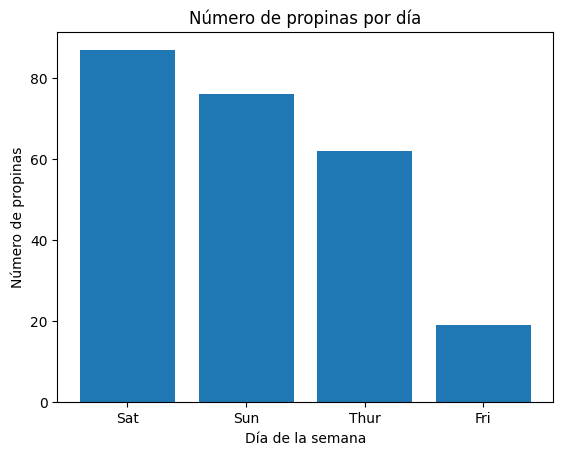

In [11]:
import matplotlib.pyplot as plt

tip_counts_by_day = tips_df['day'].value_counts()

plt.bar(tip_counts_by_day.index, tip_counts_by_day.values)

plt.xlabel('Día de la semana')
plt.ylabel('Número de propinas')
plt.title('Número de propinas por día')

plt.show()

### 6. Crea una gráfica **scatter** entre **total_bill** y **tip** utilizando matplotlib o seaborn. 

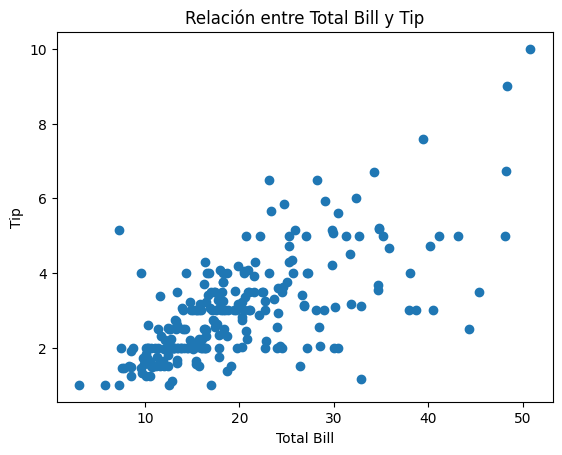

In [12]:
import matplotlib.pyplot as plt

plt.scatter(tips_df['total_bill'], tips_df['tip'])

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Relación entre Total Bill y Tip')

plt.show()

### 7. Asigna un color a los puntos en base a la variable "sex" (muéstralo en la leyenda)

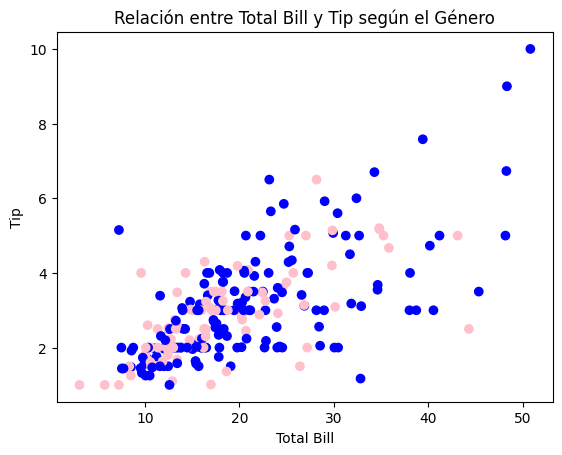

In [13]:
import matplotlib.pyplot as plt

plt.scatter(tips_df['total_bill'], tips_df['tip'], c=tips_df['sex'].map({'Male': 'blue', 'Female': 'pink'}))

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Relación entre Total Bill y Tip según el Género')

plt.show()


### 8. Muestra ambas gráficas en una única figura con subplots.

Ejemplo de resultado (es orientativo, no tiene que ser exactamente igual):

<img src="img/graficas.png" style="max-width: 600px">


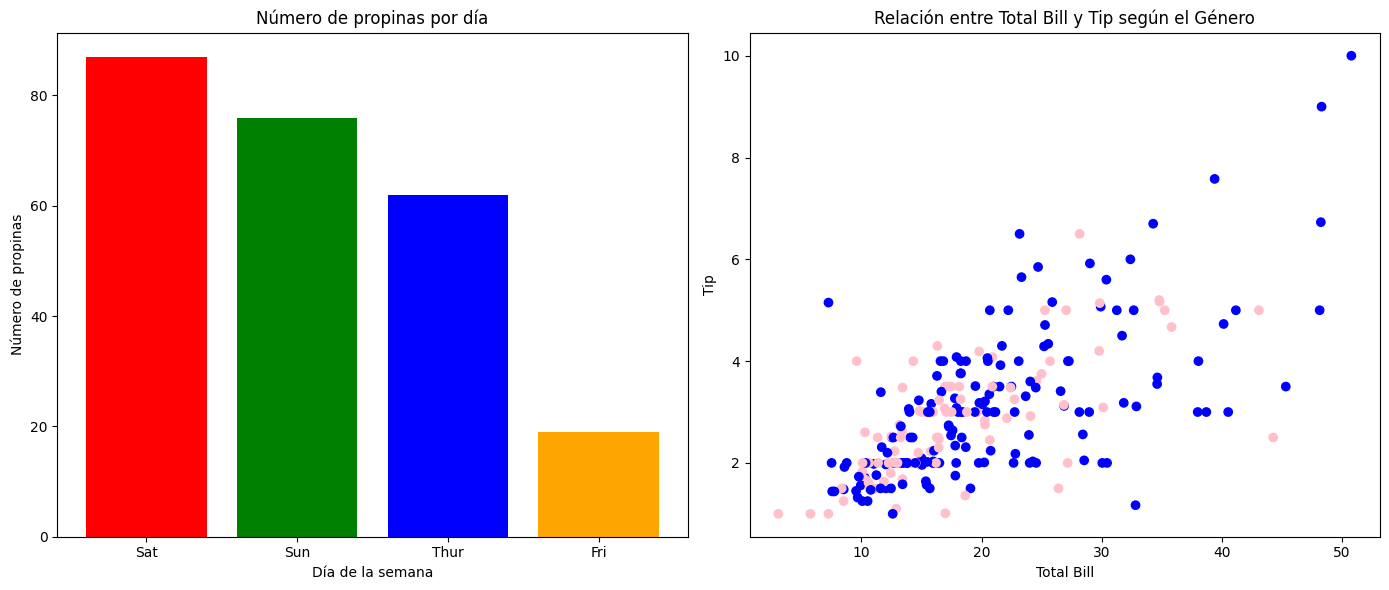

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
tip_counts_by_day = tips_df['day'].value_counts()
colors = ['red', 'green', 'blue', 'orange']  # Colores para cada día
plt.bar(tip_counts_by_day.index, tip_counts_by_day.values, color=colors)
plt.xlabel('Día de la semana')
plt.ylabel('Número de propinas')
plt.title('Número de propinas por día')

plt.subplot(1, 2, 2)
plt.scatter(tips_df['total_bill'], tips_df['tip'], c=tips_df['sex'].map({'Male': 'blue', 'Female': 'pink'}))
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Relación entre Total Bill y Tip según el Género')

plt.tight_layout()
plt.show()